Introduction to Seaborn 

(shamelessly stolen from https://elitedatascience.com/python-seaborn-tutorial#step-2)

Seaborn is a visualization package for Python that is self described:

    If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of  hard things easy too.

Obviously, make sure you HAVE $\texttt{seaborn}$ in your library...

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

After loading the relevant libraries, load the dataset $\textbf{'Pokemon.csv'}$

In [2]:
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0)

Look at the data

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function.

There are two ways you can do so.

- The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.
- The second way is to directly pass in Series of data to the axes arguments.

For example, let's compare the Attack and Defense stats for our Pokémon:

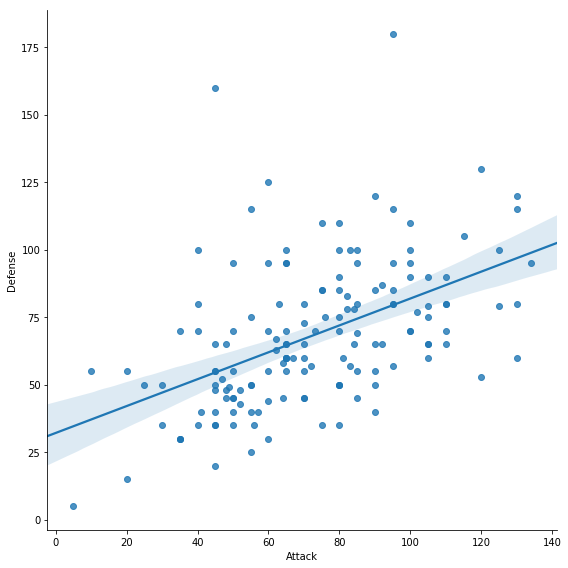

In [4]:
sns.lmplot(x='Attack', y='Defense', data=df,size=8)

If we JUST want a scatter plot, remove the automatic linear regression with the Kwarg $\texttt{fit_reg}=False$

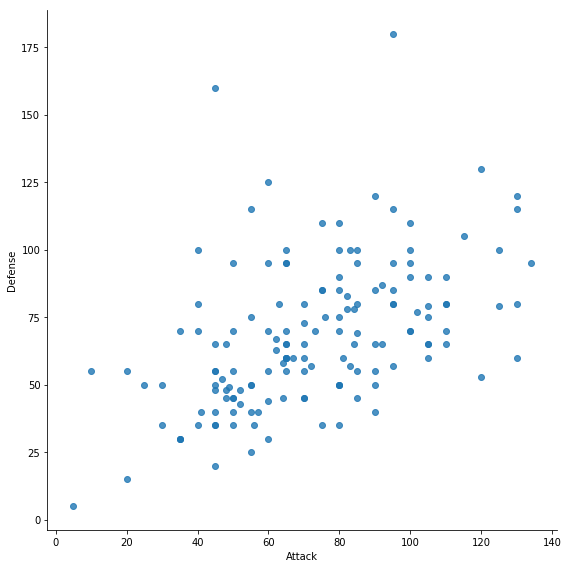

In [5]:
sns.lmplot(x='Attack', y='Defense', data=df,size=8,fit_reg=False)

And we can *further* split the data along a grouping of our choice using $\texttt{hue}$. Try $'Stage'$

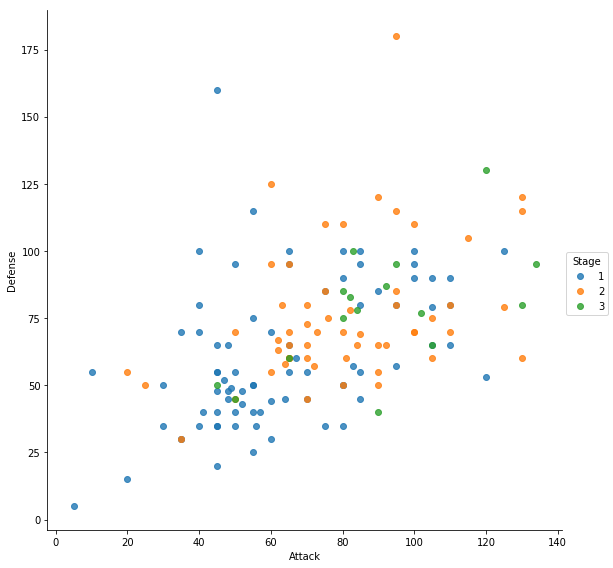

In [6]:
sns.lmplot(x='Attack', y='Defense', data=df,size=8,fit_reg=False,hue='Stage')

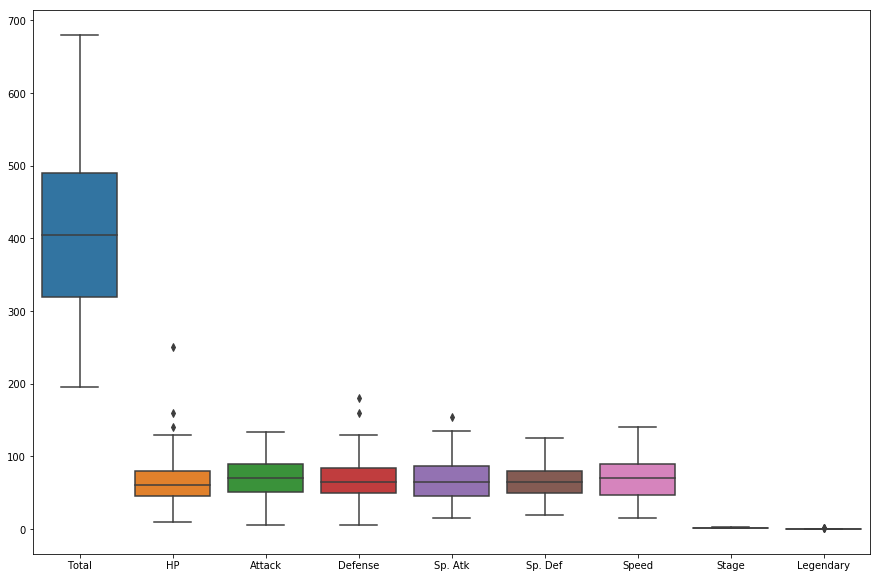

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

Recalling how to use Dataframes in Pandas, let's remove the last two.

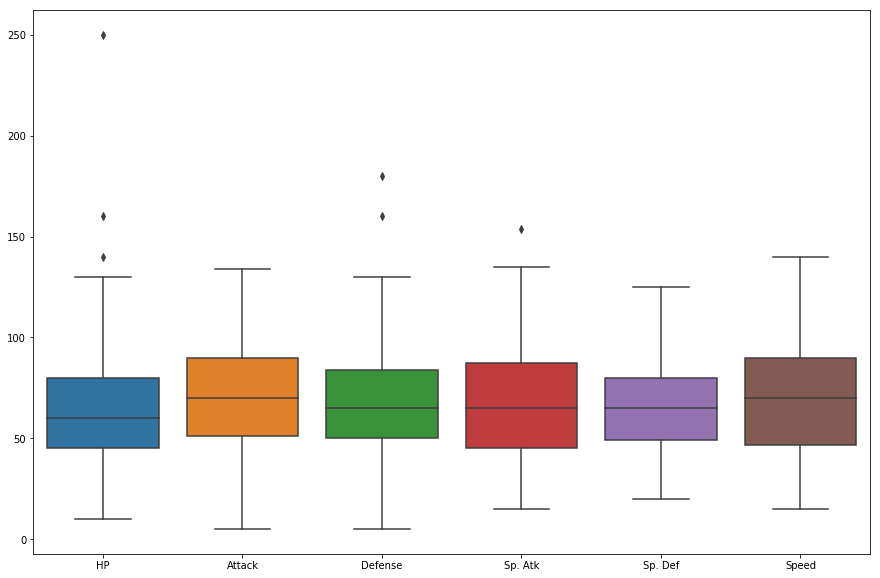

In [8]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
plt.figure(figsize=(15,10))
sns.boxplot(data=stats_df)

In [9]:
#Load our own type coloring
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

Violin Plots!
(https://en.wikipedia.org/wiki/Violin_plot)

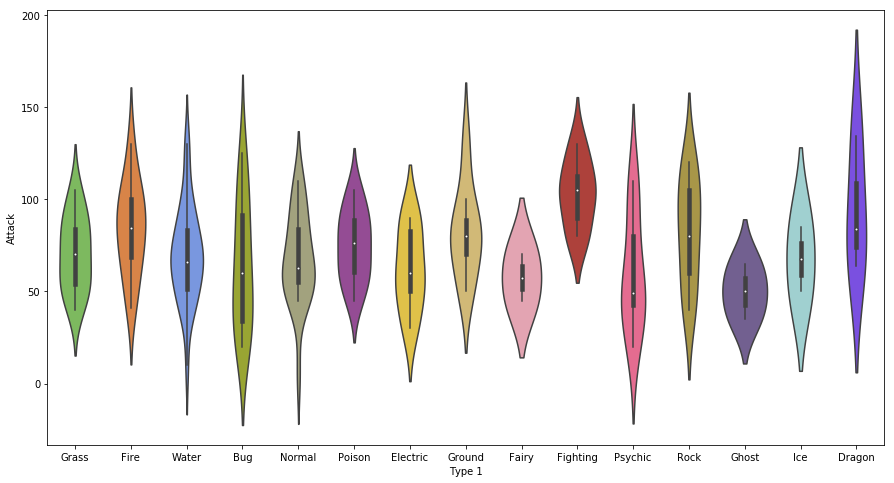

In [10]:
plt.figure(figsize=(15,8))

# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette


Histograms!

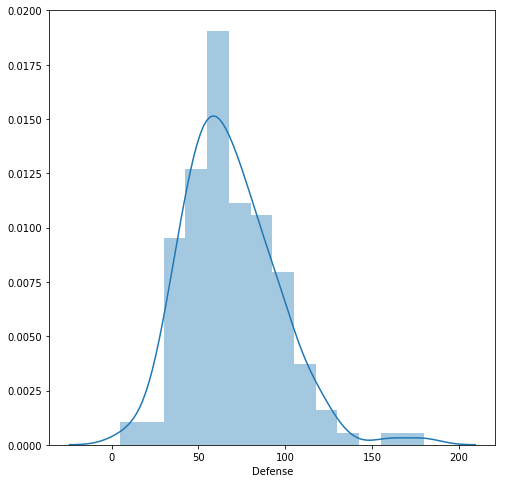

In [12]:
plt.figure(figsize=(8,8))
sns.distplot(df.Defense)

Bar plots!

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

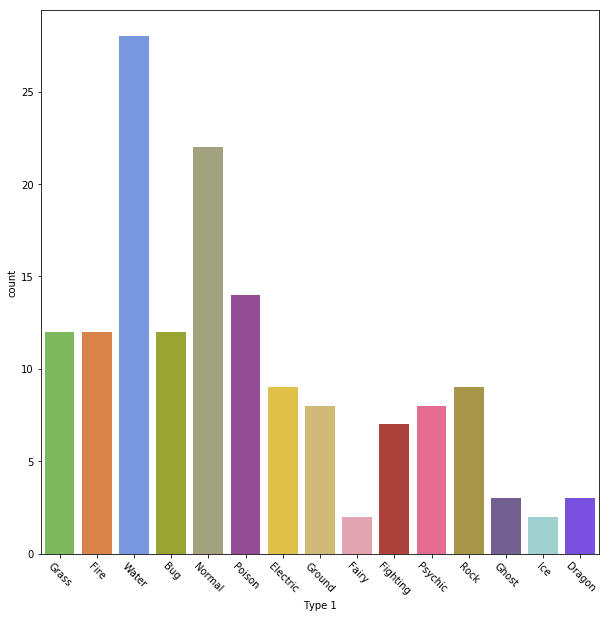

In [13]:
plt.figure(figsize=(10,10))
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

Something powerful included in Seaborn is the FactorPlot function. Factor plots make it easy to separate plots by categorical classes.



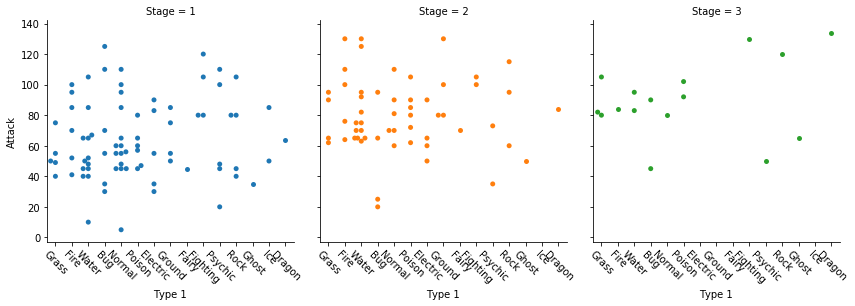

In [14]:
plt.figure(figsize=(15,5))
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

We can do **Kernel-Density-Estimate Plots**

(https://en.wikipedia.org/wiki/Kernel_density_estimation)

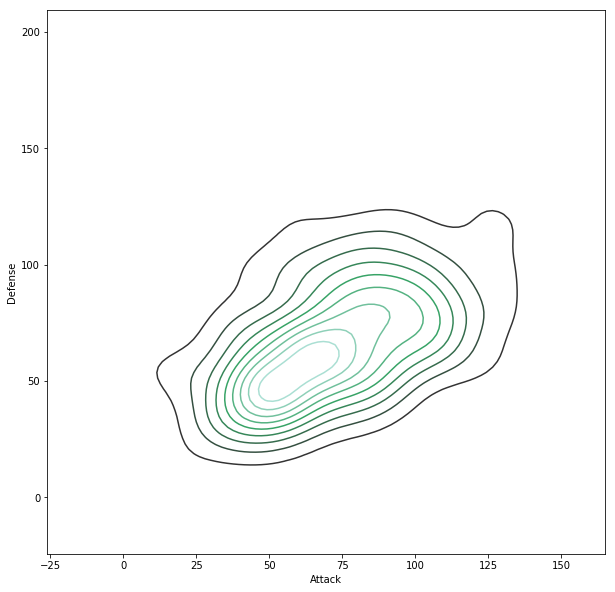

In [17]:
plt.figure(figsize=(10,10))
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

Joint Plot

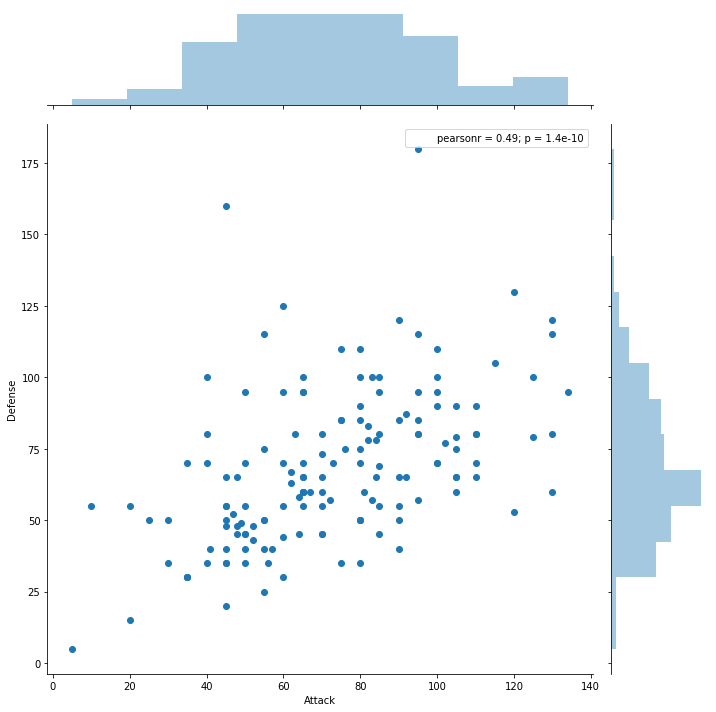

In [18]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df,size=10,kind='scatter')

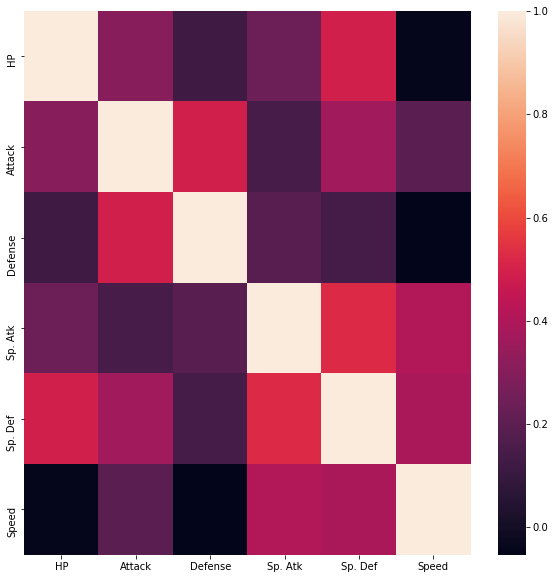

In [19]:
plt.figure(figsize=(10,10))
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

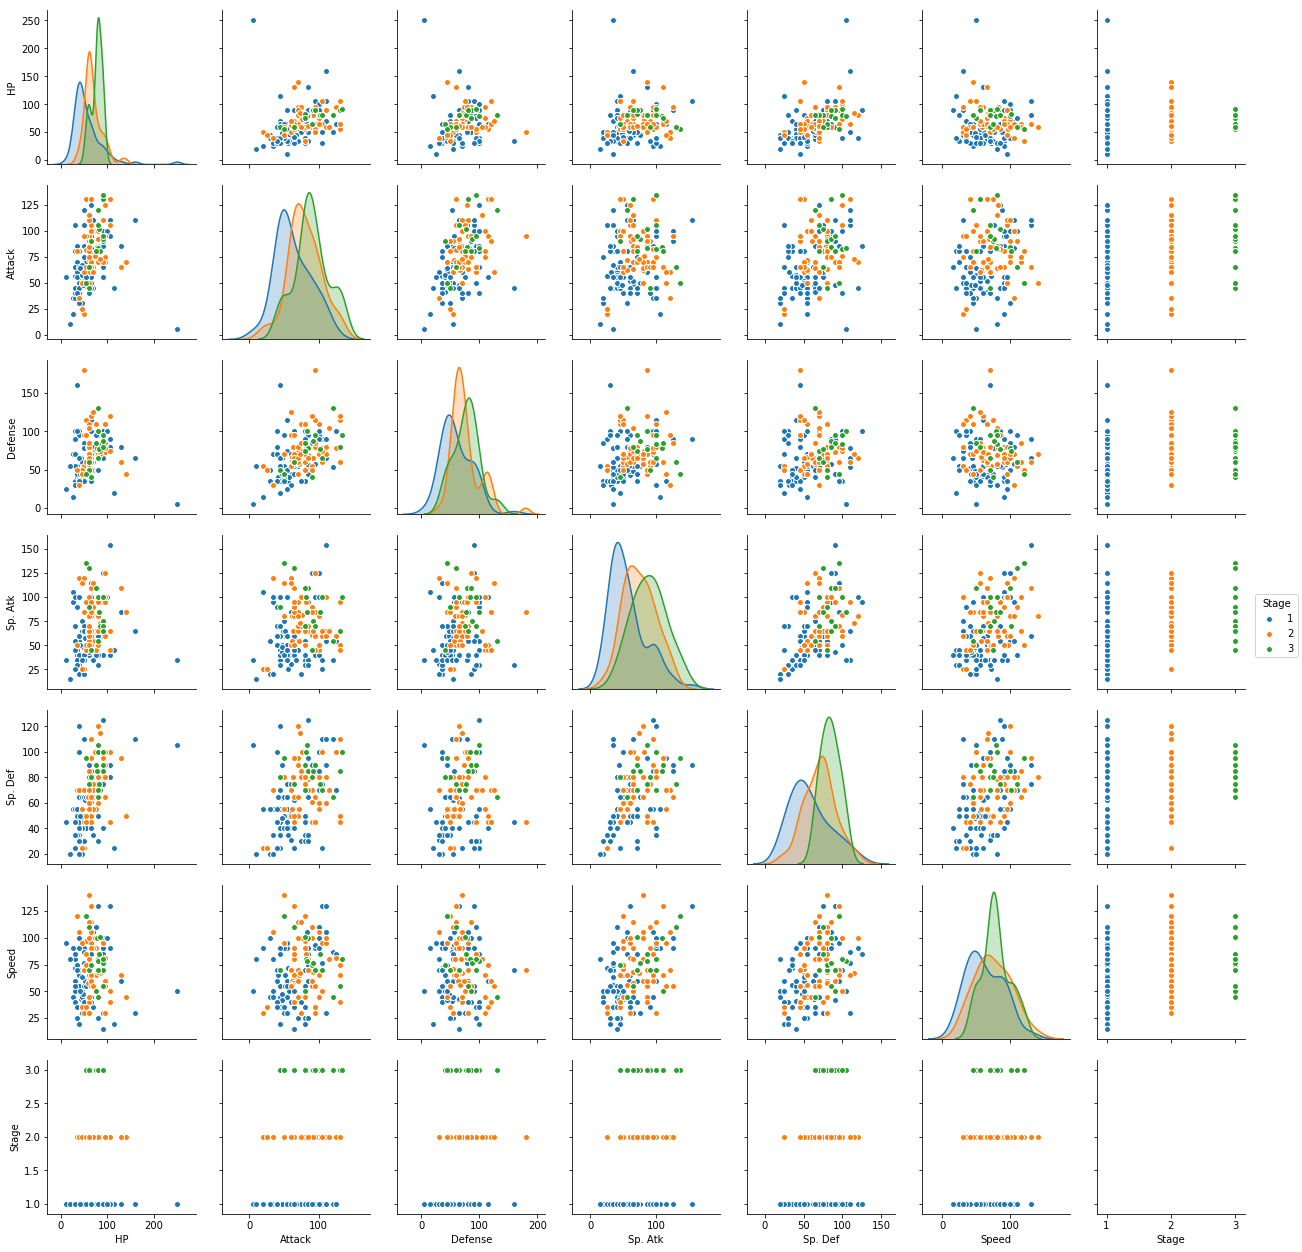

In [65]:
stats_df['Stage']=df['Stage']
sns.pairplot(data=stats_df,diag_kind='kde',hue='Stage',diag_kws=dict(shade=True))